# Telco Churn Final Project Classification Project

## Project Planning & Executive Summary

### Project Description
This project aims to identify the factors contributing to customer churn for TELCO, with the objective of providing insights to reduce churn and improve customer loyalty to the TELCO brand.

### Project Goals
The primary goals of this project were to:
* Identify factors that have a significant relationship with customer churn.
* Build an accurate classification model to predict customer churn.
* Present the findings to lead data scientists and other stakeholders at TELCO.*
### Initial Questions
The project sought answers to the following initial questions:
1. Does contract type have a significant relationship with customer churn?
2. Does device protection have a significant relationship with customer churn?
3. Does streaming TV have a significant relationship with customer churn?
4. Does having tech support have a significant relationship with customer churn?

### Executive Summary
After careful analysis, four features were selected based on visual significance and significant relationships observed through chi-square statistical testing. The Logistic Regression model emerged as the best predictor of customer churn, exhibiting consistent accuracy of 80% across the train, validate, and test sets. This performance surpassed the baseline accuracy of 73.56%.

The insights gained from this analysis will assist TELCO in understanding the reasons behind customer churn, allowing them to develop strategies to mitigate churn and enhance customer loyalty.

In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# import Wrangle functions
from env import user, password, hostname, get_db_url
import acquire
import prepare

# ignore warnings
import warnings 
warnings.filterwarnings("ignore")

# import Machine Learning Library for classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


## DATA ACQUISITION

In [2]:
telco_df = acquire.get_telco_data('telco_churn')


In [3]:
data_acquire = acquire.telco_data_acquire(telco_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   payment_type_id           7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

## DATA PREPARATION

In [4]:
# Dropped columns 'internet_service_type_id','contract_type_id','payment_type_id', 'Unnamed: 0' and created and created dummy columns
prepare_telco=prepare.prep_telco(telco_df)
prepare_telco

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,payment_type,contract_type,partner_Yes,dependents_Yes,phone_service_Yes,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male
0,0002-ORFBO,0,9,65.60,593.30,Mailed check,One year,1,1,1,...,1,0,1,0,0,1,0,0,0,0
1,0003-MKNFE,0,9,59.90,542.40,Mailed check,Month-to-month,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0004-TLHLJ,0,4,73.90,280.85,Electronic check,Month-to-month,0,0,1,...,0,0,0,0,0,1,1,1,0,1
3,0011-IGKFF,1,13,98.00,1237.85,Electronic check,Month-to-month,1,0,1,...,0,0,1,0,1,1,1,1,0,1
4,0013-EXCHZ,1,3,83.90,267.40,Mailed check,Month-to-month,1,0,1,...,1,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,13,55.15,742.90,Mailed check,One year,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7039,9992-RRAMN,0,22,85.10,1873.70,Electronic check,Month-to-month,1,0,1,...,0,0,0,0,1,1,1,1,0,1
7040,9992-UJOEL,0,2,50.30,92.75,Mailed check,Month-to-month,0,0,1,...,0,0,0,0,0,1,0,0,0,1
7041,9993-LHIEB,0,67,67.85,4627.65,Mailed check,Two year,1,1,1,...,1,0,0,0,1,0,0,0,0,1


In [5]:
# Split telco data 
telco_train,telco_validate,telco_test=prepare.split_telco(prepare_telco)
print(f'train data shape: {telco_train.shape}')
print(f'validate data shape: {telco_validate.shape}')
print(f'test data shape: {telco_test.shape}')

train data shape: (4225, 29)
validate data shape: (1409, 29)
test data shape: (1409, 29)


## DATA EXPLORATORY & ANALYSIS

### Exploring through Visualizations

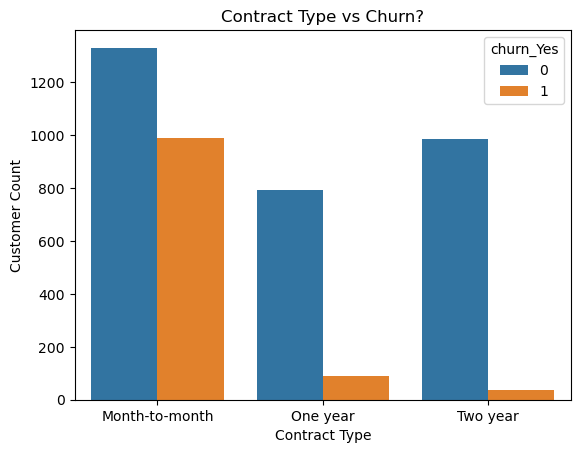

In [6]:
# 1. Visualizing the monthly contract vs churn
ct=sns.countplot(data=telco_train, x='contract_type', hue='churn_Yes')
ct.set_xlabel('Contract Type')
ct.set_ylabel('Customer Count')
plt.title('Contract Type vs Churn?')
plt.show()

#### Contract Type Visual Findings
The visual data shows that customers that the contract type has a significant impacy on the rate of churn. The longer the contract the less customers churn.

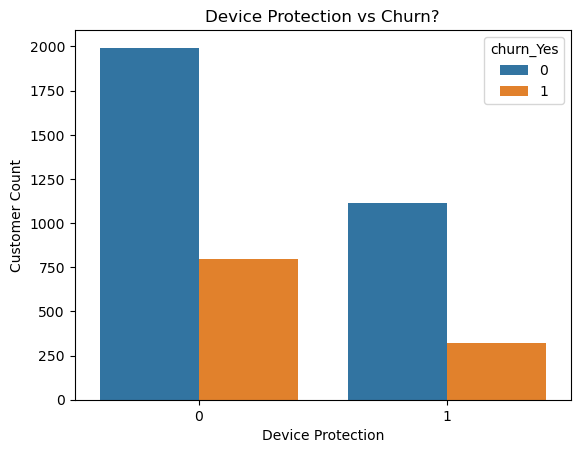

In [7]:
#Visualizing the device protection vs churn
dp=sns.countplot(data=telco_train, x='device_protection_Yes', hue='churn_Yes')
dp.set_xlabel('Device Protection')
dp.set_ylabel('Customer Count')
plt.title('Device Protection vs Churn?')
plt.show()

#### Device Protection Visual Findings
The visual data shows that customers with Device Protection churn less than those that do not have Device Protection.

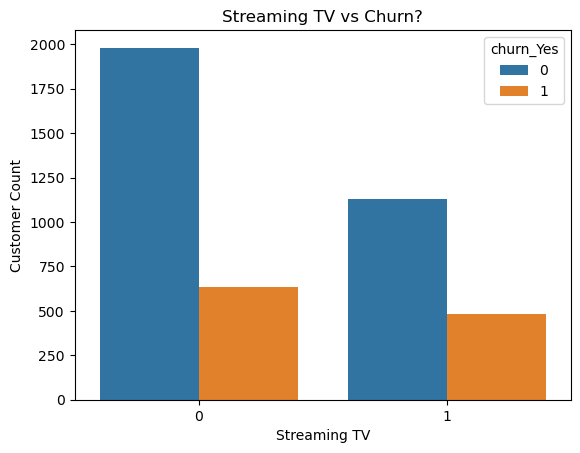

In [8]:
#Visualizing the streaming TV vs churn
st=sns.countplot(data=telco_train, x='streaming_tv_Yes', hue='churn_Yes')
st.set_xlabel('Streaming TV')
st.set_ylabel('Customer Count')
plt.title('Streaming TV vs Churn?')
plt.show()

#### Streaming TV Visual Findings
The visual data shows that customers that Stream Tv churn slightly less than those that do not Stream TV.

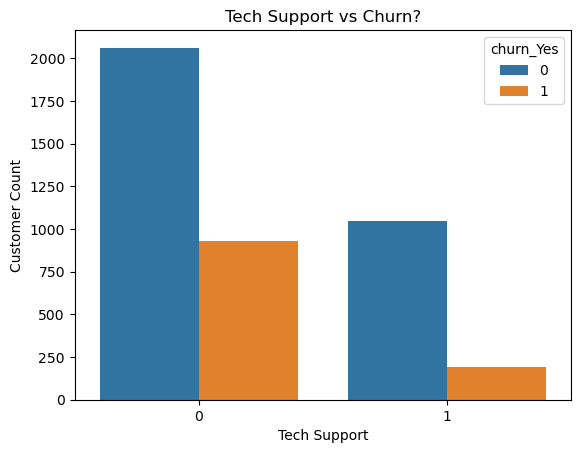

In [9]:
#Visualizing the tech support vs churn
ts=sns.countplot(data=telco_train, x='tech_support_Yes', hue='churn_Yes')
ts.set_xlabel('Tech Support')
ts.set_ylabel('Customer Count')
plt.title('Tech Support vs Churn?')
plt.show()

#### Tech Support Visual Findings
The visual data shows that customers with tech support churn significantly less than those that do not have Tech Support.

### 1. Statistical Testing  - Contract Type
#### Contract Type Hypothesis:  
    • alpha = .05 
    • H0 = Contract type is independent of customer churn 
    • Ha = Contract type is dependent to customer churn  
    • Outcome: We reject the Null Hypothesis.
#####  Chi-square test using 2 discrete independent variables Contract Type vs Churn. 

Chi-square statistic: 710.6774384452048
p-value: 4.76820627630308e-155
Degrees of freedom: 2
Expected frequencies: [[1708.11266272  613.88733728]
 [ 649.55360947  233.44639053]
 [ 750.33372781  269.66627219]]


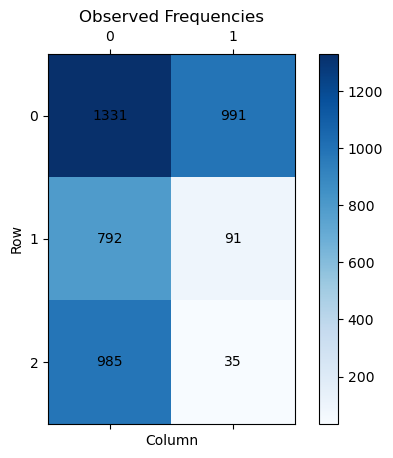

In [10]:
alpha = 0.05
ct_observed = pd.crosstab(telco_train.contract_type, telco_train.churn_Yes)


# Example contingency table
ct_observed1 = np.array([[1331, 991],
                         [792, 91],
                         [985, 35]])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(ct_observed1)

# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(ct_observed1, cmap='Blues')
fig.colorbar(cax)

# Add text to each cell
for i in range(ct_observed1.shape[0]):
    for j in range(ct_observed1.shape[1]):
        ax.text(j, i, ct_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()



                        

In [11]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")
    

We reject the null


#### Contract Type Statistical Findings
The statistical data corroberates with the visual data that     
• Ha = Contract Type is dependent to customer churn   

But the relationship is fair of 710 to 4225. Can be used in modeling. 

In the future test ones that show less visual signficance to see if their statistical findings matches the visual.

### 2. Statistical Testing - Tech Support
#### Tech Support Hypothesis:  
* alpha = .05 
* H0 = Tech support is independent of customer churn 
* Ha = Tech support is dependent to customer churn  
* Outcome: We reject the Null Hypothesis.
#####  Chi-square test using 2 discrete independent variables Tech Support vs Churn. 

Chi-square statistic: 110.05925867290274
p-value: 9.510476114214062e-26
Degrees of freedom: 1
Expected frequencies: [[2200.24331361  790.75668639]
 [ 907.75668639  326.24331361]]


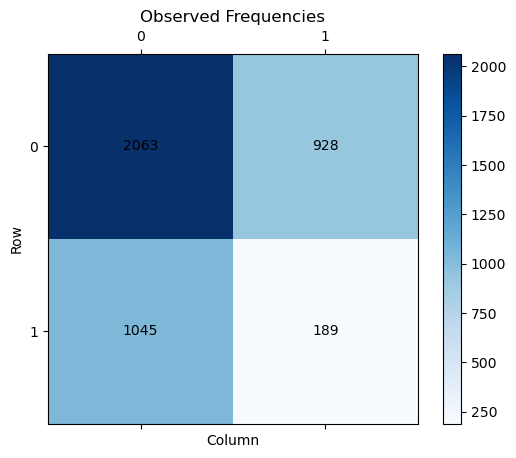

In [12]:

alpha = 0.05

dt_observed = pd.crosstab(telco_train.tech_support_Yes, telco_train.churn_Yes)

# Example contingency table
dt_observed1 = np.array([[2063, 928],
                         [1045, 189]])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(dt_observed1)



# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(dt_observed1, cmap='Blues')
fig.colorbar(cax)

# Add text to each cell
for i in range(dt_observed1.shape[0]):
    for j in range(dt_observed1.shape[1]):
        ax.text(j, i, dt_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()



In [13]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


#### Tech Support Statistical Findings
The statistical data corroberates with the visual data that     
• Ha = Tech support is dependent to customer churn   

But the relationship is weak of 110 to 4225. Can be used in modeling. 

## MODELING
### Selecting evaluation methods 
Using the Tech Support and Contract Type for modeling with an established baseline accuracy of 74%.  I will use Decision Tree, Logistic Regression and Random Forest with a Random Seed = 42 to exceed baseline accuracy without overfitting. 

In [14]:
#Splitting the data in to X and Y to take out the data with curn and those without 
telco_X_train = telco_train.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_train = telco_train.select_dtypes(exclude=['object']).churn_Yes

telco_X_validate = telco_validate.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_validate = telco_validate.select_dtypes(exclude=['object']).churn_Yes

telco_X_test = telco_test.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_test = telco_test.select_dtypes(exclude=['object']).churn_Yes

### Evaluate on Baseline

In [15]:
#Exploring churn The majority churn_Yes. value counts were '0', and will be use to define baseline
telco_train.churn_Yes.value_counts()

0    3108
1    1117
Name: churn_Yes, dtype: int64

In [16]:
baseline =(telco_y_train==0).mean()
print(f'The baseline accuracy is: {baseline:.2%}')



The baseline accuracy is: 73.56%


### Evaluate on Train and Validate

### DECISION TREE

[Text(0.5, 0.875, 'tenure <= 16.5\ngini = 0.389\nsamples = 4225\nvalue = [3108, 1117]'),
 Text(0.25, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.496\nsamples = 1530\nvalue = [836, 694]'),
 Text(0.125, 0.375, 'internet_service_type_None <= 0.5\ngini = 0.419\nsamples = 876\nvalue = [614, 262]'),
 Text(0.0625, 0.125, 'gini = 0.479\nsamples = 502\nvalue = [302, 200]'),
 Text(0.1875, 0.125, 'gini = 0.277\nsamples = 374\nvalue = [312, 62]'),
 Text(0.375, 0.375, 'total_charges <= 120.0\ngini = 0.448\nsamples = 654\nvalue = [222, 432]'),
 Text(0.3125, 0.125, 'gini = 0.241\nsamples = 143\nvalue = [20, 123]'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 511\nvalue = [202, 309]'),
 Text(0.75, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.265\nsamples = 2695\nvalue = [2272, 423]'),
 Text(0.625, 0.375, 'streaming_movies_No internet service <= 0.5\ngini = 0.103\nsamples = 1505\nvalue = [1423, 82]'),
 Text(0.5625, 0.125, 'gini = 0.15\nsamples = 956\nvalue = [878, 78]'),


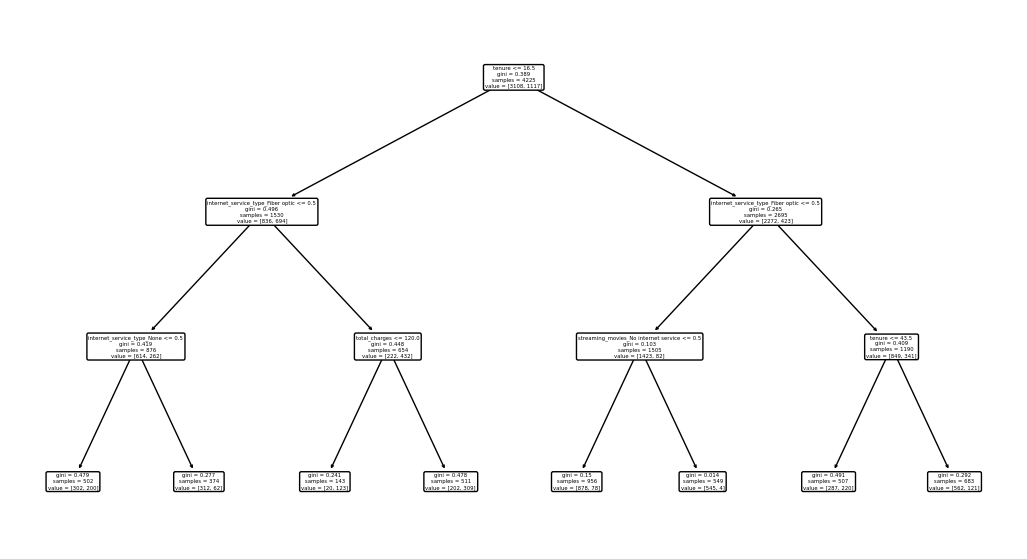

In [17]:
# Make, FIT, Use Decision Tree
clf_telco_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_telco_tree = clf_telco_tree.fit(telco_X_train, telco_y_train)
plt.figure(figsize=(13, 7))
plot_tree(clf_telco_tree, feature_names=telco_X_train.columns, rounded=True)

In [18]:
print(f'decision tree training score: {clf_telco_tree.score(telco_X_train, telco_y_train):.2%}')
print(f'decision tree validate score: {clf_telco_tree.score(telco_X_validate, telco_y_validate):.2%}')
print('Both decision tree scores higher than baseline accuracy')

decision tree training score: 78.53%
decision tree validate score: 80.48%
Both decision tree scores higher than baseline accuracy


### LOGISTIC REGRESSION

In [19]:
# Make, Fit, Use Logistic Regression
logit = LogisticRegression(C=1, random_state=42)
logit.fit(telco_X_train, telco_y_train)
y_prediction = logit.predict(telco_X_train)

In [20]:
print(f'logistic regression training score: {logit.score(telco_X_train, telco_y_train):.2%}')
print(f'logistic regression validate score: {logit.score(telco_X_validate, telco_y_validate):.2%}')
print('Both logistic regression scores are higher than baseline accuracy')

logistic regression training score: 79.88%
logistic regression validate score: 79.91%
Both logistic regression scores are higher than baseline accuracy


### RANDOM FOREST

In [21]:
# Make, Fit, Use Random Forest
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=42)
rf.fit(telco_X_train, telco_y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [22]:
print(f'training score: {rf.score(telco_X_train, telco_y_train):.2%}')
print(f'validate score: {rf.score(telco_X_validate, telco_y_validate):.2%}')
print('Both random forest scores are higher than baseline accuracy')

training score: 89.28%
validate score: 78.21%
Both random forest scores are higher than baseline accuracy


### Final Selection of Evaluation Model
Although Decision Tree Models scored higher than the baseline accuracy of 74% and the scores were consistent in both training and validation models, Logistic Regression had better accuracy and consistency than decision Tree with an over all 80%. The logistic regression model was chosen over Random Forest Model because although the Random Forest Model had highest training score of the three models and baseline in training, there was an 11% difference between the training and validation score. The Logistic Regression Model will be used on test data.

### Evaluate TOP MODEL on Test

In [23]:
logit.fit(telco_X_train, telco_y_train)
test_y_prediction = logit.predict(telco_X_test)
# logit.classes_
#  logit.predict_proba(telco_X_test) [:,1]

In [24]:
print(f'logistic regression training score: {logit.score(telco_X_train, telco_y_train):.2%}')
print(f'logistic regression validate score: {logit.score(telco_X_validate, telco_y_validate):.2%}')
print(f'logistic regression validate score: {logit.score(telco_X_test, telco_y_test):.2%}')
print('All three logistic regression scores are higher than baseline accuracy with a consistant accuracy of 80%')

logistic regression training score: 79.88%
logistic regression validate score: 79.91%
logistic regression validate score: 80.34%
All three logistic regression scores are higher than baseline accuracy with a consistant accuracy of 80%


In [25]:
telco_y_test_prediction = pd.DataFrame({
    'customer_id': telco_test['customer_id'],
    'Probability of churn': logit.predict_proba(telco_X_test) [:,1],
    'Test Prediction': logit.predict(telco_X_test)
})
telco_y_test_prediction.head()

,customer_id,Probability of churn,Test Prediction
941,1360-RCYRT,0.137622,0
1404,2075-PUEPR,0.004162,0
5515,7766-CLTIC,0.355639,0
3684,5196-SGOAK,0.645914,1
7017,9957-YODKZ,0.758514,1


In [26]:
print(classification_report(telco_y_test,test_y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1032
           1       0.66      0.54      0.60       377

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



## Conclusion Summary 

Based on the classification data analysis conducted, the following key findings were made:

- Four features were selected based on their visual significance and their significant relationship in chi-square statistical testing for training the Classification Model.
- The Logistic Regression model outperformed the baseline accuracy of 73.56% and consistently achieved an accuracy of 80% on the train, validate, and test sets, making it the best model for predicting churn.
- Hypothesis 1, regarding the dependence of contract type on customer churn, was supported by the data and can be used in modeling with a fair relationship observed.
- Hypothesis 2 and Hypothesis 3, regarding the dependence of data protection and streaming_movies on customer churn, were rejected as the relationships were extremely low, and these features will not be used in modeling.
- Hypothesis 4, regarding the dependence of tech support on customer churn, was supported by the data with a weak relationship, and it will be included in the modeling process to meet the project requirements.
- Tech support and contract type were selected as features for modeling, aiming to exceed the baseline accuracy of 74%. Decision Tree, Logistic Regression, and Random Forest models were implemented with a Random Seed of 42 to avoid overfitting.
- Logistic Regression outperformed the other models, achieving an overall accuracy of 80% consistently across training, validation, and testing.

## Recommendations 
Further steps include dropping the data protection and streaming_movies columns during data preparation due to their shallow relationship with customer churn. Conducting chi-square statistical testing on the remaining columns to identify significant relationships above a threshold (e.g., 100) can further refine the subset for modeling. Additionally, implementing different versions with varied hyperparameters can be explored.
- To gain additional insights, it is suggested to create an exit survey for customers who have churned and a welcome survey for new customers to understand their reasons for leaving their previous company and joining TELCO.

## Takeaways

While the classification models performed well and achieved high accuracy, the information obtained from the selected features could have provided more valuable insights into customer churn risk. However, the analysis did identify weak relationships with features such as data protection, streaming movies, and tech support. Moving forward, these elements can be excluded from future modeling efforts to focus on more impactful predictors.